In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traitlets import observe

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gs = pd.read_csv('gender_submission.csv')


In [16]:
train.sample(10)
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S
318,1210,3,"Jonsson, Mr. Nils Hilding",male,27.0,0,0,350408,7.8542,NaN,S
332,1224,3,"Thomas, Mr. Tannous",male,NaN,0,0,2684,7.2250,NaN,C
94,986,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S
65,957,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,NaN,0,0,F.C.C. 13534,21.0000,NaN,S
209,1101,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [17]:


#gs.sample(10)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
test_s = test.merge(gs, how='right', on='PassengerId')
test_s.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [24]:
print(test_s.Cabin.value_counts())

Cabin
B57 B59 B63 B66    3
B45                2
C23 C25 C27        2
C78                2
C31                2
                  ..
B41                1
C7                 1
D40                1
D38                1
C105               1
Name: count, Length: 76, dtype: int64


In [27]:
print(train.Age.describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<Axes: >

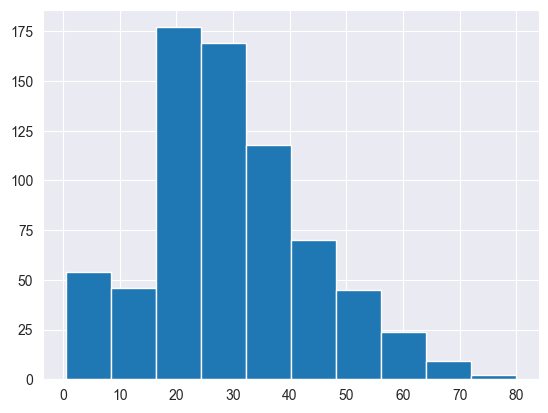

In [28]:
train.Age.hist()

In [33]:
nulltrain = train[train.Age.isnull()]
nulltrain.info()
nulltrain.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  177 non-null    int64  
 1   Survived     177 non-null    int64  
 2   Pclass       177 non-null    int64  
 3   Name         177 non-null    object 
 4   Sex          177 non-null    object 
 5   Age          0 non-null      float64
 6   SibSp        177 non-null    int64  
 7   Parch        177 non-null    int64  
 8   Ticket       177 non-null    object 
 9   Fare         177 non-null    float64
 10  Cabin        19 non-null     object 
 11  Embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q


In [36]:
print(train.Age.mean())
print(train.Age.median())


print('Avg male: ',train[train.Sex=='male'].Age.mean())
print('Avg female: ',train[train.Sex=='female'].Age.mean())

29.69911764705882
28.0
Avg male:  30.72664459161148
Avg female:  27.915708812260537


In [40]:
train.Ag = train.Age.fillna(30)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
train['AgeCut'] = pd.cut(train.Age,
                         bins=[0, 20, 50, 70],
                         labels=['mean', 'old', 'child'])
train.drop('AgeCUt', axis=1, inplace=True)
train.info()
train.sample()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeCut       709 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------

             PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
PassengerId         1.00     -0.01   -0.04  0.04  -0.06  -0.00  0.01
Survived           -0.01      1.00   -0.34 -0.08  -0.04   0.08  0.26
Pclass             -0.04     -0.34    1.00 -0.37   0.08   0.02 -0.55
Age                 0.04     -0.08   -0.37  1.00  -0.31  -0.19  0.10
SibSp              -0.06     -0.04    0.08 -0.31   1.00   0.41  0.16
Parch              -0.00      0.08    0.02 -0.19   0.41   1.00  0.22
Fare                0.01      0.26   -0.55  0.10   0.16   0.22  1.00


<Axes: >

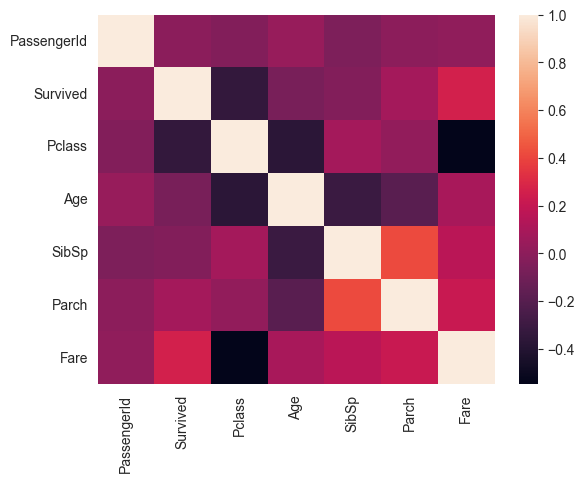

In [71]:
m = train.corr(numeric_only=True)
print(m.round(2))
sns.heatmap(m)

In [81]:
print(train.groupby('Sex').Survived.agg({'sum','size'}))
print(train.groupby('Pclass').Survived.agg({'sum','size'}))
print(train.groupby('AgeCut').Survived.agg({'sum','size'}))

        size  sum
Sex              
female   314  233
male     577  109
        size  sum
Pclass           
1        216  136
2        184   87
3        491  119
        size  sum
AgeCut           
mean     179   82
old      471  186
child     59   21


/var/folders/4c/jkygkw1s1yj6cx40mzszqyg00000gn/T/ipykernel_2471/3381606076.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('AgeCut').Survived.agg({'sum','size'}))


In [93]:
gh = train.groupby(['Sex','Pclass','AgeCut']).Survived.agg({'sum','size'})
print(gh)
g = gh.reset_index()
g['Proc'] = np.round((g['sum']/g['size']*100), 2)
print(g)


                      size  sum
Sex    Pclass AgeCut           
female 1      mean      14   13
              old       58   56
              child     13   13
       2      mean      16   16
              old       55   50
              child      3    2
       3      mean      47   24
              old       54   22
              child      1    1
male   1      mean       7    4
              old       68   31
              child     23    4
       2      mean      19   10
              old       68    4
              child     12    1
       3      mean      76   15
              old      168   23
              child      7    0
       Sex  Pclass AgeCut  size  sum    Proc
0   female       1   mean    14   13   92.86
1   female       1    old    58   56   96.55
2   female       1  child    13   13  100.00
3   female       2   mean    16   16  100.00
4   female       2    old    55   50   90.91
5   female       2  child     3    2   66.67
6   female       3   mean    47   24   51.06


/var/folders/4c/jkygkw1s1yj6cx40mzszqyg00000gn/T/ipykernel_2471/3762237232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gh = train.groupby(['Sex','Pclass','AgeCut']).Survived.agg({'sum','size'})
